## QQ-plot Understanding

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = sns.load_dataset('iris')

<Axes: xlabel='sepal_length', ylabel='Density'>

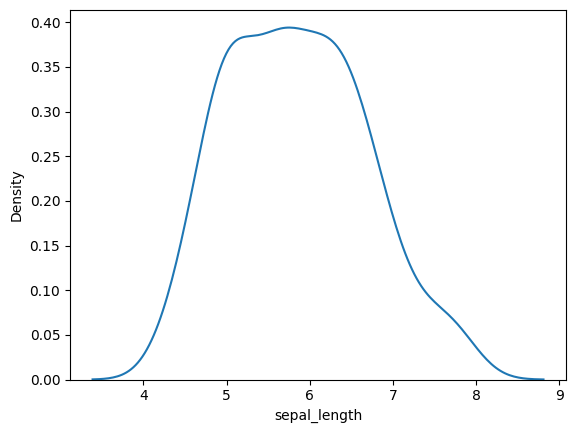

In [3]:
sns.kdeplot(df['sepal_length']) # look like normal distribution

In [4]:
temp = sorted(df['sepal_length'].tolist()) # sort the dataoints first

In [5]:
y_quant = []

for i in range(1,101):
  y_quant.append(np.percentile(temp,i)) # calculate 1-100 percentile of sorted datapoints

In [6]:
samples = np.random.normal(loc=0,scale=1,size=1000) # sample dataset of 1000 points having standard normal distribution

In [7]:
x_quant = []

for i in range(1,101):
  x_quant.append(np.percentile(samples,i)) # calculating 1-100 percentile of sample datapoints

<Axes: >

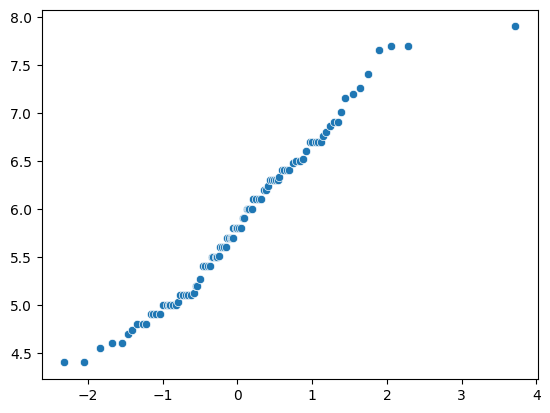

In [8]:
sns.scatterplot(x=x_quant,y=y_quant) # we are getting sort of straight line (we can say sepal_length is roughly normally distributed)

## An easier alternative of finding distribution of an column using QQ-plot directly

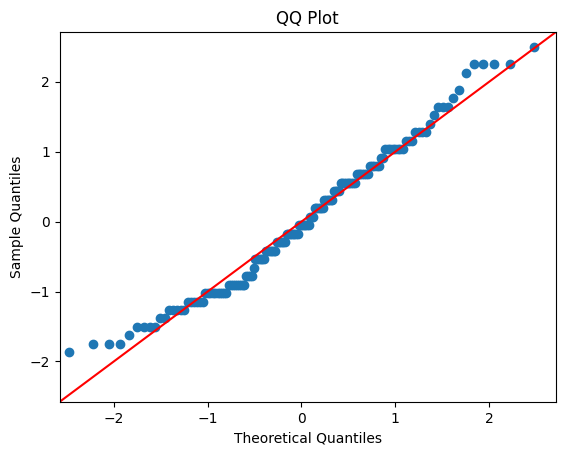

In [9]:
# using statsmodel

import statsmodels.api as sm
import matplotlib.pyplot as plt

# Create a QQ plot of the two sets of data
fig = sm.qqplot(df['sepal_length'], line='45', fit=True) # creating a 45 degree straight line

# Add a title and labels to the plot
plt.title('QQ Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

# Show the plot
plt.show()


## As we can see all points are not touching straight line. We can considers it sort of normal distribution (not fully)

## QQ plot is not limited to detecting normal distributions.
## It has X data distribution (any kind of distribution) and Y data distribution (any distribution) then we compare X distribution with the Y distribution

In [10]:
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Generate a set of random data
x = np.random.uniform(low=0, high=1, size=1000) # uniform distribution with mean=0 and std=1

(array([ 92.,  94.,  97.,  97., 104., 105., 104., 109., 104.,  94.]),
 array([8.79925124e-04, 1.00755992e-01, 2.00632058e-01, 3.00508125e-01,
        4.00384191e-01, 5.00260258e-01, 6.00136325e-01, 7.00012391e-01,
        7.99888458e-01, 8.99764524e-01, 9.99640591e-01]),
 <BarContainer object of 10 artists>)

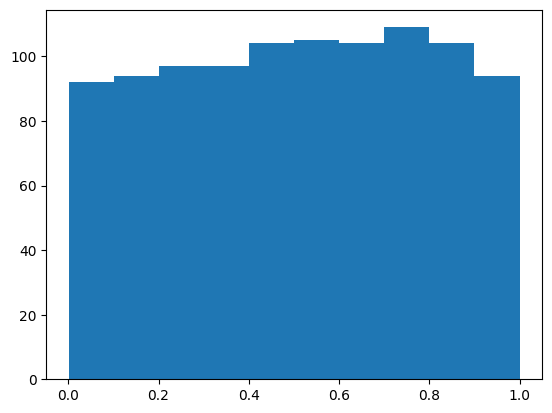

In [11]:
plt.hist(x) # this generated data is not perfectly uniform

In [12]:
# Fit a uniform distribution to the data
params = stats.uniform.fit(x)
dist = stats.uniform(loc=params[0], scale=params[1]) # we have created a uniform distribution for comparision

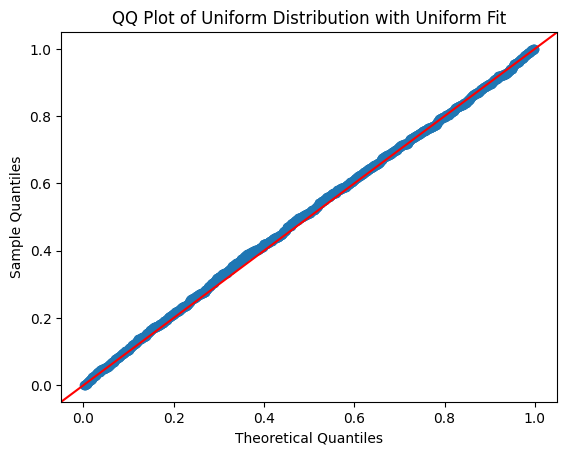

In [16]:
# Create a QQ plot of the data using the uniform distribution
fig = sm.qqplot(x, dist=dist, line='45') # providing dist=dist because default value is set to normal

# Add a title and labels to the plot
plt.title('QQ Plot of Uniform Distribution with Uniform Fit')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

# Show the plot
plt.show() # both distribution is similar (uniform)

## How to detect a a given distribution is Pareto distribution

### 1) way : Log Log Plot

In [17]:
import numpy as np

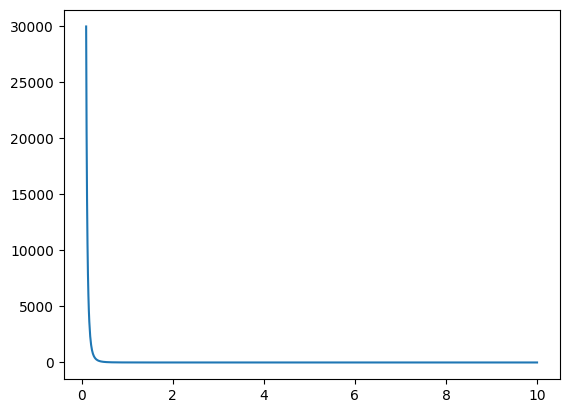

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters of the Pareto distribution
alpha = 3
xm = 1

# Create an array of x values
x = np.linspace(0.1, 10, 1000)

# Calculate the y values of the Pareto distribution
y = alpha * (xm**alpha) / (x**(alpha+1))

plt.plot(x,y)

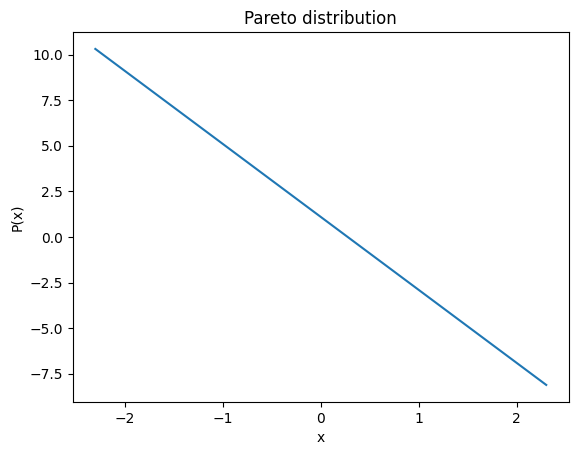

In [19]:
# Create the log-log plot
plt.plot(np.log(x),np.log(y)) # If after taking log of both x and y, a linear line forms. Then it indicates that x distribution posses parato distribution

# Add labels and a title
plt.xlabel('x')
plt.ylabel('P(x)')
plt.title('Pareto distribution')

# Show the plot
plt.show()

### 2) way : Q Q Plot

In [20]:
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Define the parameters of the Pareto distribution
alpha = 2
xm = 1

# Generate a set of random data from the Pareto distribution
x = stats.pareto.rvs(b=alpha, scale=xm, size=1000)

(array([981.,  13.,   3.,   1.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([ 1.00019869,  6.72782714, 12.45545559, 18.18308404, 23.91071249,
        29.63834094, 35.36596939, 41.09359784, 46.82122629, 52.54885474,
        58.27648319]),
 <BarContainer object of 10 artists>)

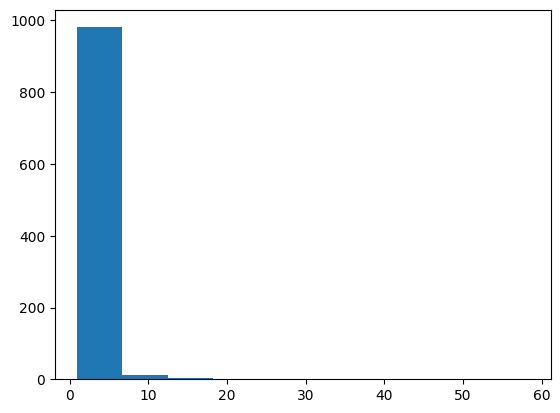

In [21]:
plt.hist(x) # most of the points lies in starting of of x

In [22]:
# Fit a Pareto distribution to the data
params = stats.pareto.fit(x, floc=0)

# Create a Pareto distribution object with the fitted parameters
dist = stats.pareto(b=params[0], scale=params[2])


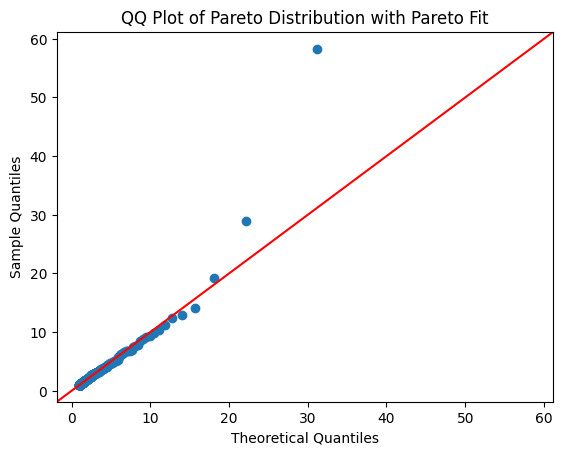

In [23]:
# Create a QQ plot of the data using the Pareto distribution
fig = sm.qqplot(x, dist=dist, line='45')

# Add a title and labels to the plot
plt.title('QQ Plot of Pareto Distribution with Pareto Fit')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

# Show the plot
plt.show()

#### All the startng values lies perfectly on the line but some points are away from the lines. But instead of these deviated points we can confidently say that x follows parato distribution.

## Tranformation techniques to transfrom non gaussian distribution into a gaussian (normal) distribution

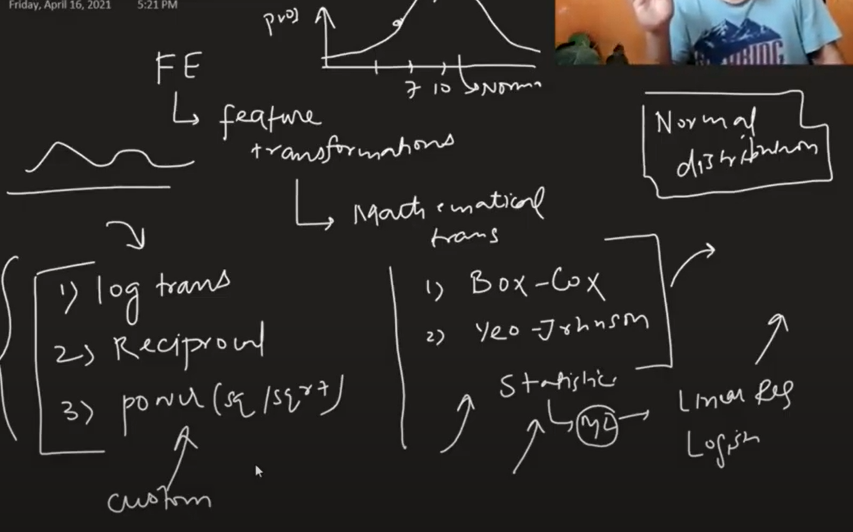

### Types of transformers techniques:

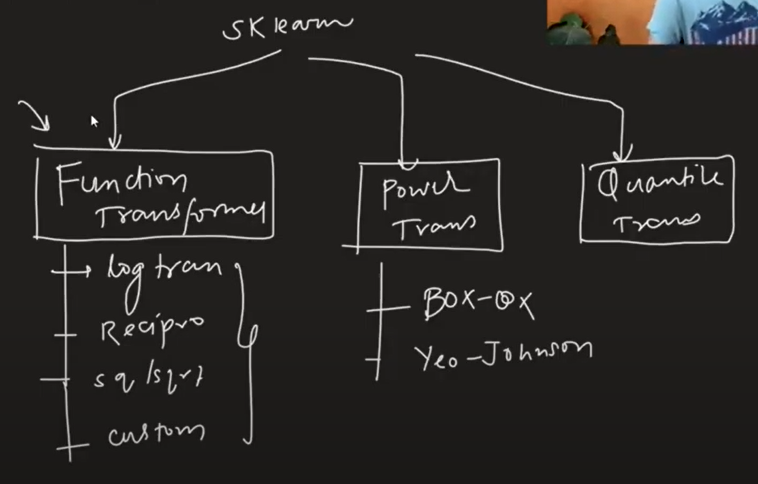

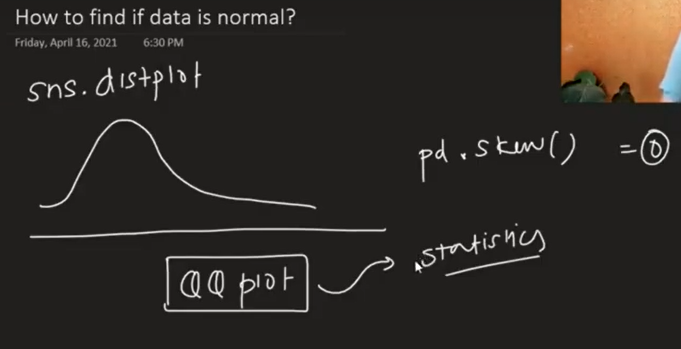

## 1) Function Transformer
### (i) Log transform

- Log transform should be apply on right skewed data.
- This technique shift all the data points from left skewed to the center. By taking log of x values. (If before x values are 0,10,100,1000 with gap of 10 (right skewed data) then after taking log 0,10,100,1000 will come at equal distance between them (normal distributed))

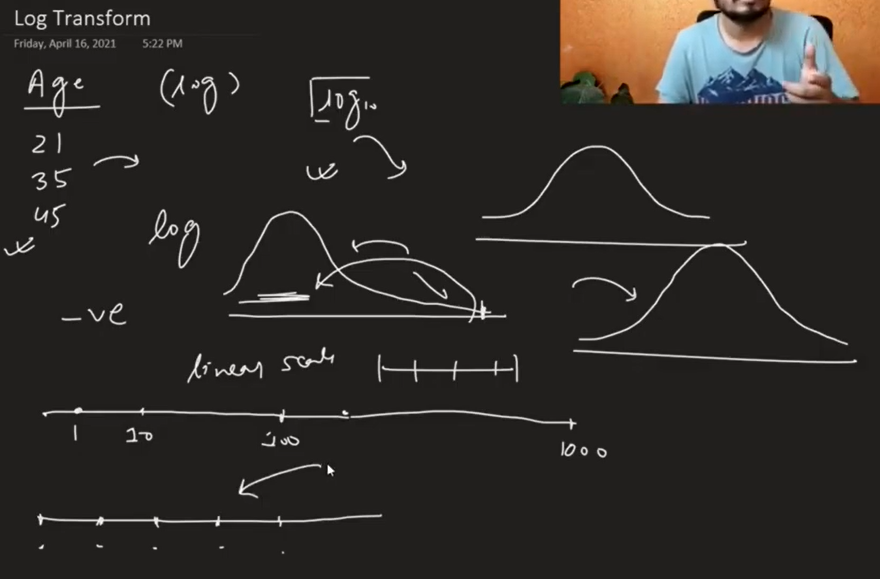

### (ii) Reciprocal transform (1/x)
- It convert large values into small values and small values into large values.

### (iii) Square transformation (x^2)
- This transformation is used for left skewed dataset

### (iv) Square root transformation (x*0.5)
- we should use every transformation techniques and select the best one

## 1) Power Transformation
### (i) Box Cox transformation
- This is a general transformers
- Lambda is power and we have to find out how much power of x is good for prediction.
- 2 ways to find this lambda
    - bayesian statistics
    - Max likelihood
- this technique is applicable on x>0 (not 0 or negative). This is drawback of box cox tranformation which is solved by below technique.

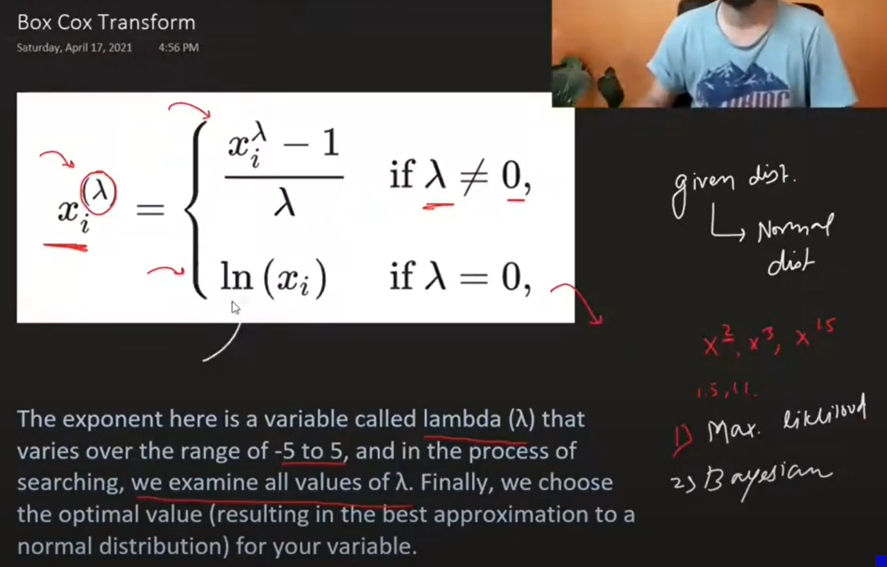

### (ii) Yoe - johnson transformation

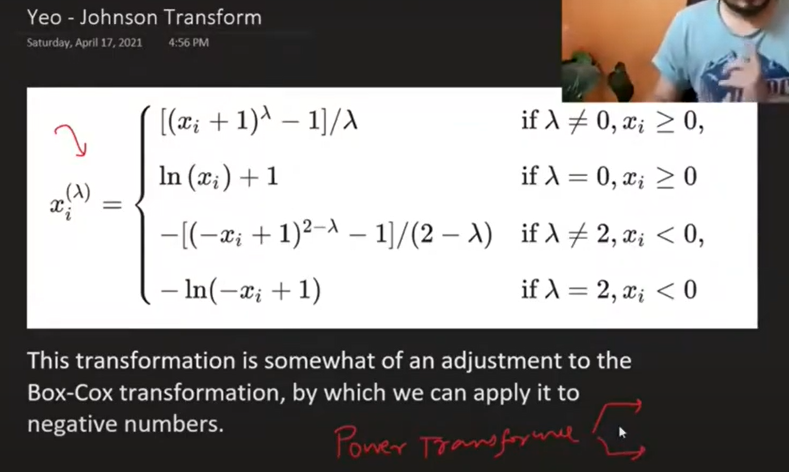